<a href="https://colab.research.google.com/github/MohammadrezaTale/Digikala-sentiment-analysis/blob/master/Sentiment_Analysis_(2_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.metrics import classification_report


## Import Dataset

In [4]:
!gdown --id 1iC_2Bfnw2xp7x5xod4TfU6zUL8JYjkRM

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iC_2Bfnw2xp7x5xod4TfU6zUL8JYjkRM
To: /content/100k digikala.xlsx
100% 19.7M/19.7M [00:00<00:00, 71.1MB/s]


In [5]:
df = pd.read_excel('100k digikala.xlsx')

In [6]:
df.shape

(100000, 12)

In [7]:
df.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [13]:
df.drop(['product_id','likes','dislikes'], axis=1, inplace = True)

In [14]:
df.head()

,product_title,title_en,user_id,verification_status,recommend,title,comment,advantages,disadvantages
0,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [15]:
df['title_en'].value_counts().sort_values()

GC        2
GF        4
FF       60
BC      524
HC     1063
DF     1348
MO     2254
AV     3865
HA     4207
PA     5751
MA     6395
IT     6999
TS     7915
TC     9846
FA    10465
HW    10483
PC    12443
AC    16376
Name: title_en, dtype: int64

In [16]:
df[df['title_en'] == 'IT']

,product_title,title_en,user_id,verification_status,recommend,title,comment,advantages,disadvantages
0,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
5,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,497032,verified,recommended,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ..."
6,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,574130,verified,recommended,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]"
10,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,IT,794316,verified,recommended,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به..."
21,هارددیسک اکسترنال ترنسند مدل StoreJet 25H3 ظرف...,IT,714216,verified,\N,هارد ترنسند,با سلام..منم اینو از دیجی گرفتم ..تو نگاه اول ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99945,لپ تاپ 15 اینچی ایسوس مدل X541UV - I,IT,3934338,verified,\N,در خصوص قیمت و کیفیت,قیمت مناسب با توجه به وضعیت بازار,NaN,NaN
99955,ماوس مخصوص بازی ای فورتک مدل N50,IT,8084906,verified,no_idea,موس a4tech,من یکی از این موس ها گرفتم وقتی دابل کلیک می ک...,NaN,NaN
99966,تونر الوان مدل 05A,IT,1463329,verified,not_recommended,درام یک بار مصرف,درام جهت شارژ مجدد افت کیفیت زیادی دارد و به ش...,NaN,NaN
99971,اسپیکر بلوتوثی قابل حمل میفا مدل F6,IT,981594,verified,recommended,سلام,عالیه,NaN,NaN


In [17]:
df_ac = df[(df['title_en'] == 'AC') | (df['title_en'] == 'MO') |  (df['title_en'] == 'IT')]

In [ ]:
df_ac.drop(['product_title','title_en','user_id','verification_status','title','advantages','disadvantages'], axis=1 ,inplace=True)

In [19]:
df_ac.head()

,recommend,comment
0,\N,واقعا عالیه. من که ازش خیلی راضیم
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
3,no_idea,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...
4,no_idea,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...
5,recommended,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...


In [20]:
df_ac.shape

(25629, 2)

In [21]:
df_ac['recommend'].value_counts().sort_values()

no_idea            2397
not_recommended    4795
\N                 8783
recommended        9654
Name: recommend, dtype: int64

In [22]:
df_ac = df_ac[(df_ac['recommend'] == 'not_recommended') | (df_ac['recommend'] =='recommended')]

In [23]:
df_ac.shape

(14449, 2)

In [24]:
df_ac.head()

,recommend,comment
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
5,recommended,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...
6,recommended,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...
10,recommended,نزدیک به دو ساله که این هارد رو خریدم. استفاده...
13,recommended,من این پاور بانک رو حدود یک سال پیش از دیجی کا...


<BarContainer object of 2 artists>

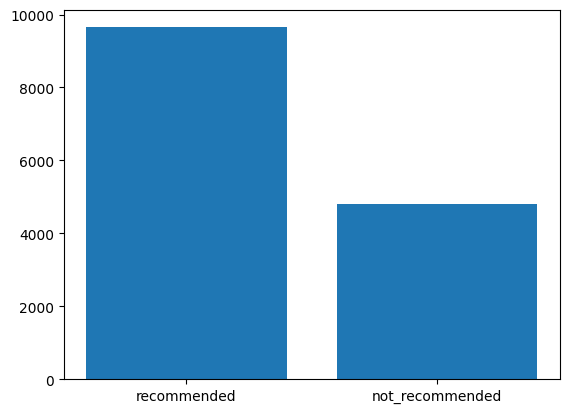

In [25]:
plt.bar(['recommended','not_recommended'], df_ac['recommend'].value_counts())

In [26]:
df_ac['comment'].iloc[11]

'سلام. دوستان این هدست با توجه به قیمتش فوق العادست. درضمن من از فروشگاه اختصاصی  این دستگاه برنامه ای خیلی خوب و با کیفیتی رو به صورت رایگان دانلود کردم. اما اگر کیفیتش رو با هدست های چند میلیونی که با یک کامپیوتر گیمینک کار میکنند مقایسه کنیم قطعا این مدل که انرژی مورد نیازشو از یک گوشی میگیره کم تره. ولی با این حال اون قدر فوق العادست که این اصلا اهمیت نداره. در ضمن اگر یه نرم افزار رویه گوشیتون نصب کنید میتونید اجرای خودکار رو غیر فعال کنید و برنامه هایی رو هم که در فروشگاه اختصاصی این دستگاه نیست رو اجرا کنید.'

## hazm

In [ ]:
#hazm
!pip install hazm
from hazm import *

In [28]:
stemmer = Stemmer()
lemma = Lemmatizer()
normalizer = Normalizer()

In [29]:
stopword = stopwords_list()
unwanted_num = {'زیاد','هستند','عالی','نیستند','نبود','نمی شود', 'است', 'می شود', 'شد', 'شده', 'بود' ,'نیست', 'خوبی', 'خوب' ,'بهترین', 'بهتر', 'متاسفانه'}
stopwords = [item for item in stopword if item not in unwanted_num]

In [ ]:
stopword

## preprocessing

In [31]:
def preprocess(review_text):
  review_text = re.sub('https\S+','',review_text)
  review_text = re.sub('[a-zA-z]','',review_text)
  review_text = re.sub(r'[!”#$%&’()*٪+,-/:;<=>?@[\]^_`{|}~0-9۱۲۳۴۵۶۷۸۹۰]','',review_text)
  review_text = re.sub(r'[\s]{2,}', ' ',review_text)
  review_text = re.sub(r'(\w)\1{2,}', r'\1',review_text)
  review_text = normalizer.normalize(review_text)
  # review_text = sent_tokenize(review_text)
  review_text = word_tokenize(review_text)
  review_text = [item for item in review_text if item not in stopwords]
  review_text = [stemmer.stem(i) for i in review_text]
  review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
  review_text = [i for i in review_text if len(i) > 1]
  review_text = ' '.join(review_text)
  if re.search(r'[\u0600-\u06FF]', review_text):
    return review_text
  else:
    return None

In [32]:
tqdm.pandas()

In [33]:
df_ac.isnull().sum()

recommend    0
comment      7
dtype: int64

In [34]:
df_ac = df_ac.dropna()

In [35]:
df_ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14442 entries, 1 to 99983
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recommend  14442 non-null  object
 1   comment    14442 non-null  object
dtypes: object(2)
memory usage: 338.5+ KB


In [36]:
df_ac['CleanText'] = df_ac['comment'].progress_apply(preprocess)

100%|██████████| 14442/14442 [00:26<00:00, 553.91it/s]


In [37]:
df_ac['CleanText'].iloc[11]

'سلا دوس هدس توجه قیمت العادس درضمن فروشگاه اختصاص دستگاه برنامه خوب کیفیت صور رایگ دانلود کیفیت هدست میلیون کامپیو گیمینک کار مقایسه قطعا مدل انرژ نیازشو گوش میگیره تره اون قدر العادس اصلا اهم نداره یه نرم\u200cافزار رویه گوشیتون نصب میتونید اجرا خودکار فعال برنامه فروشگاه اختصاص دستگاه نیس'

In [38]:
df_ac.head(5)

,recommend,comment,CleanText
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,سلا نظر بگ می‌خواس موضوع اشاره نظرات کالا ثب ه...
5,recommended,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,سلا دوس من مثه دوس خرید تحقیق لپ‌تاپ عال انجا ...
6,recommended,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,سال هس اسپیکرو خرید واقعا حرف نداره برندا دیگه...
10,recommended,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,هارد خرید استفاده سنگین از ندا عنو یه بک آپ اط...
13,recommended,من این پاور بانک رو حدود یک سال پیش از دیجی کا...,پاور بانک سال دیج کالا گرف واقعا از راض هس عال...


In [39]:
df_ac = df_ac.dropna()

In [40]:
df_ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14436 entries, 1 to 99983
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recommend  14436 non-null  object
 1   comment    14436 non-null  object
 2   CleanText  14436 non-null  object
dtypes: object(3)
memory usage: 451.1+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df_ac['recommend'] = label_encoder.fit_transform(df_ac['recommend'])
# 2 = recommended 1= not_recommended 0=no_idea

In [42]:
df_ac.iloc[20:50:5,:]

,recommend,comment,CleanText
52,1,من نمیدونم چرا میگید صداش زیاده. به نظرم صداش ...,نمیدون میگید صدا زیاده نظر صدا طبیعیه زیاد نیس...
62,1,من دقیقا دو ساله این هارد رو خریدم و توی نظرات...,دقیقا هارد خرید تو نظر جزو کسا هس داد برید نظر...
79,1,این موس خیلی قشنگ و خوش دست و البته باکیفیت هس...,موس قشنگ خوش‌دس باکیف هس بنظر بدرد گیمر میخوره...
93,0,نسبت به قیمت لپ تاپ خوبیه_x000D_\nولی اگر کیفی...,قیم لپ‌تاپ خوبیه کیف ساخ طراح ظاهر براتون مهمه...
117,1,بعد از ۳ سال استفاده در پخش خودرو به جرات میشه...,سال استفاده خودرو جر میشه یک‌کلا فوق‌العاده خر...
143,1,من این رو ۲.۵ سال پیش از دیجیکالا خریدم. بدون ...,سال دیجیکالا خرید مشکل خرا خط آسیب‌دیدگ هیچ دس...


## TF/IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=2, max_features= 7000)
X_tfidf = tf.fit_transform(df_ac['CleanText']).todense()

In [44]:
labels = df_ac['recommend'].values

In [45]:
X_tfidf = np.squeeze(np.asarray(X_tfidf))

In [ ]:
#balancing data
from imblearn.over_sampling import SMOTE

# X is your text data and y is the corresponding labels
smote = SMOTE()
X, y = smote.fit_resample(X_tfidf, labels)

## train test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15432, 6412), (3858, 6412), (15432,), (3858,))

In [49]:
import warnings
warnings.filterwarnings("ignore")

## Logistic regression

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# hyperparameters tuning
# LR = LogisticRegression()
# grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'penalty': ['l1', 'l2'],
#         'solver': ['lbfgs', 'liblinear']}

# # perform grid search cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(estimator=LR, param_grid=grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=4)
# grid_search.fit(X_train, y_train)

# # print the best hyperparameters and the corresponding mean cross-validation score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Accuracy Score: ", grid_search.best_score_)

In [52]:
#logisticregression
from time import perf_counter
start_tra = perf_counter()

LR = LogisticRegression(C=10, penalty='l2', solver='liblinear', random_state=42)
LR.fit(X_train,y_train)

end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))

score = LR.score(X_test, y_test)
print("Accuracy:", score)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

train phase time:  0.7
Accuracy: 0.9126490409538621
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1900
           1       0.94      0.89      0.91      1958

    accuracy                           0.91      3858
   macro avg       0.91      0.91      0.91      3858
weighted avg       0.91      0.91      0.91      3858



## Naive bayes

In [53]:
# hyperparameters tuning
# params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
#           'fit_prior': [True, False],
#          }

# nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# nb_grid.fit(X_train,y_train)

# print('Best Parameters : {}'.format(nb_grid.best_params_))
# print('Best Accuracy Through Grid Search : {:.3f}\n'.format(nb_grid.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters : {'alpha': 0.5, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.898



In [54]:
start_tra = perf_counter()

NB = MultinomialNB(alpha=0.5, fit_prior= True)
NB.fit(X_train,y_train)

end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))


score = NB.score(X_test, y_test)
print("Accuracy:", score)
y_pred_NB = NB.predict(X_test)
print(classification_report(y_test, y_pred_NB))

train phase time:  0.5
Accuracy: 0.897874546397097
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1900
           1       0.91      0.89      0.90      1958

    accuracy                           0.90      3858
   macro avg       0.90      0.90      0.90      3858
weighted avg       0.90      0.90      0.90      3858



## testing model

In [55]:
# LogisticRegression
X_pred = tf.transform([preprocess('چقددد خفنننن بود')]).todense()
X_pred = np.asarray(X_pred)
y_new = LR.predict(X_pred)
if y_new[0] == 1:
  print('Positive')
else:
  print('Negative')

Negative


In [56]:
# Naive Bayes
X_pred = tf.transform([preprocess('خیلی بد بود')]).todense()
X_pred = np.asarray(X_pred)
y_new = NB.predict(X_pred)
if y_new[0] == 1:
  print('Positive')
else:
    print('Negative')

Negative
